Step 1: Import Libraries and Load Dataset

In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import Perceptron
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Mount Google Drive to access files
from google.colab import drive
drive.mount('/content/drive')  # Mount Google Drive

# Load the CSV file from Google Drive (replace with your actual file path)
file_path = '/content/drive/MyDrive/banknotes.csv'  # Adjust this path
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
df.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,variance,skewness,curtosis,entropy,class
0,-0.89569,3.00250,-3.606700,-3.44570,1
1,3.47690,-0.15314,2.530000,2.44950,0
2,3.91020,6.06500,-2.453400,-0.68234,0
3,0.60731,3.95440,-4.772000,-4.48530,1
4,2.37180,7.49080,0.015989,-1.74140,0


Step 2: Preprocessing the Data

In [6]:
# Assume 'class' column is the label for real/fake classification, and the rest are features.
X = df.drop(columns=['class'])  # Features
y = df['class']  # Labels

# Split dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the features (important for SVM and KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Step 3: Implementing KNN, SVM, and Perceptron

In [7]:
# K-Nearest Neighbors (KNN)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train)
knn_pred = knn.predict(X_test_scaled)

# Support Vector Machine (SVM)
svm = SVC(kernel='linear')
svm.fit(X_train_scaled, y_train)
svm_pred = svm.predict(X_test_scaled)

# Perceptron
perceptron = Perceptron(max_iter=1000)
perceptron.fit(X_train_scaled, y_train)
perceptron_pred = perceptron.predict(X_test_scaled)

Step 4: Creating a Confusion Matrix

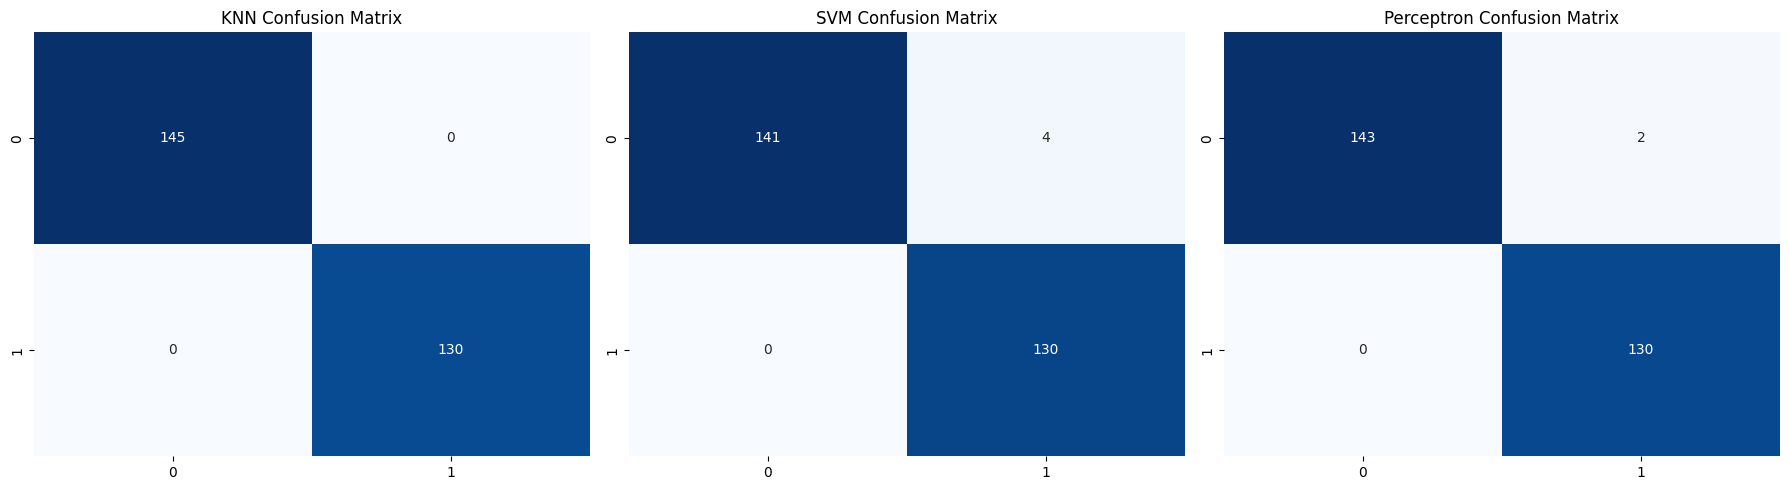

In [8]:
# Confusion Matrix for KNN
cm_knn = confusion_matrix(y_test, knn_pred)

# Confusion Matrix for SVM
cm_svm = confusion_matrix(y_test, svm_pred)

# Confusion Matrix for Perceptron
cm_perceptron = confusion_matrix(y_test, perceptron_pred)

# Plotting Confusion Matrices using Seaborn
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', ax=axes[0], cbar=False)
axes[0].set_title('KNN Confusion Matrix')

sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', ax=axes[1], cbar=False)
axes[1].set_title('SVM Confusion Matrix')

sns.heatmap(cm_perceptron, annot=True, fmt='d', cmap='Blues', ax=axes[2], cbar=False)
axes[2].set_title('Perceptron Confusion Matrix')

plt.tight_layout()
plt.show()

Step 5: Accuracy of Each Model (KNN, SVM, and Perceptron)

In [11]:
from sklearn.metrics import accuracy_score

# Calculate accuracy for each model
knn_accuracy = accuracy_score(y_test, knn_pred)
svm_accuracy = accuracy_score(y_test, svm_pred)
perceptron_accuracy = accuracy_score(y_test, perceptron_pred)

# Print the accuracy scores in percentage format
print(f"KNN Accuracy: {knn_accuracy * 100:.2f}%")
print(f"SVM Accuracy: {svm_accuracy * 100:.2f}%")
print(f"Perceptron Accuracy: {perceptron_accuracy * 100:.2f}%")

KNN Accuracy: 100.00%
SVM Accuracy: 98.55%
Perceptron Accuracy: 99.27%


Step 6: Design a User Interface to Get Input Features and Display Results

Step 6.1: Install Necessary Libraries

In [12]:
!pip install ipywidgets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 16.8 MB/s eta 0:00:00


Step 6.2: Import Libraries:

In [14]:
import ipywidgets as widgets
from IPython.display import display

Step 6.3: Define Input Fields and Layout

In [15]:
# Create input fields for features with labels and layout
feature_labels = ['Variance', 'Skewness', 'Curtosis', 'Entropy']  # Replace with actual feature names
feature_inputs = []
for label in feature_labels:
    feature_input = widgets.FloatText(description=label, layout=widgets.Layout(width='200px'))
    feature_inputs.append(feature_input)

# Arrange input fields in a vertical box
input_box = widgets.VBox(feature_inputs)

Step 6.4: Create Button and Output

In [16]:
# Create a classify button
classify_button = widgets.Button(description="Classify Currency", button_style='success')  # Add styling

# Output widget for results
output = widgets.Output()

Step 6.5: Define Classification Function

In [17]:
def classify_currency(change):
    # Get input values from feature inputs
    input_data = np.array([[input.value for input in feature_inputs]])
    input_data_scaled = scaler.transform(input_data)

    # Predict using your trained model (e.g., KNN)
    prediction = knn.predict(input_data_scaled)

    # Display result in the output widget
    with output:
        output.clear_output()  # Clear previous output
        if prediction == 1:
            print("The currency note is REAL.")
        else:
            print("The currency note is FAKE.")

Step 6.6: Link Button and Display

In [18]:
# Link the button to the classification function
classify_button.on_click(classify_currency)

# Display the GUI elements
display(widgets.HBox([input_box, classify_button]), output)

Output()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Step 7: Saving The Trained Model

In [24]:
import pickle

In [27]:
filename = 'realfakecurrency_knn_model.sav'
pickle.dump(knn, open(filename, 'wb'))

In [28]:
filename = 'realfakecurrency_svm_model.sav'
pickle.dump(svm, open(filename, 'wb'))

In [29]:
filename = 'realfakecurrency_perceptron_model.sav'
pickle.dump(perceptron, open(filename, 'wb'))